In [2055]:
print("Hello World")

Hello World


In [2056]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import plot_tree

In [2057]:
# Load train and validation datasets
df_train = pd.read_csv("data_files/train.csv")
df_validation = pd.read_csv("data_files/validation.csv")

In [2058]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.770,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.9,5
1,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.99680,3.46,0.59,10.2,5
2,9.8,0.250,0.49,2.7,0.088,15.0,33.0,0.99820,3.42,0.90,10.0,6
3,11.4,0.625,0.66,6.2,0.088,6.0,24.0,0.99880,3.11,0.99,13.3,6
4,7.1,0.720,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,5


In [2059]:
df_validation.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4,4
1,8.3,0.490,0.36,1.8,0.222,6.0,16.0,0.99800,3.18,0.60,9.5,6
2,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
3,8.1,0.780,0.10,3.3,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,5
4,7.5,0.380,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.6,4


In [2060]:
# Dividing training data into input features and target features
X_train = df_train.drop('quality', axis = 1)
y_train = df_train['quality']

In [2061]:
# Dividing validation data into input features and target features
X_validation = df_validation.drop('quality', axis = 1)
y_validation = df_validation['quality']

In [2062]:
# Function for LinearRegression Model
def linear_regression(X_train, y_train, X_validation, y_validation):
    # Defining the model
    model = LinearRegression()

    # Fitting the model
    model.fit(X_train, y_train)

    # Predicting
    y_pred = model.predict(X_validation)

    print(f"Using Linear Regression Model: ")

    # Error
    print(f"MSE: {mean_squared_error(y_validation, y_pred)}")
    print(f"RMSE: {root_mean_squared_error(y_validation, y_pred)}")

    # R2 Score
    print(f"R2 Score: {r2_score(y_validation, y_pred)}")

In [2063]:
# Function for RandomForest Model
def random_forest_reg(X_train, y_train, X_validation, y_validation):
    # Defining the model
    model = RandomForestRegressor(n_estimators=200)

    # Fitting the model
    model.fit(X_train, y_train)

    # Predicting
    y_pred = model.predict(X_validation)

    print(f"Using Random Forest Model: ")

    # Evaluation - MSE, RMSE
    print(f"MSE: {mean_squared_error(y_validation, y_pred)}")
    print(f"RMSE: {root_mean_squared_error(y_validation, y_pred)}")
 
    # R2 Score
    print(f"R2 Score: {r2_score(y_validation, y_pred)}")

    # Plot specific tree from the forest
    plt.figure(figsize=(50, 50))
    plot_tree(model.estimators_[0], feature_names = X_train.columns, max_depth=2, filled = True)
    plt.show()


In [2064]:
# Function for KNNRegressor
def knn_reg(X_train, y_train, X_validation, y_validation):
    # Defining the model
    model = KNeighborsRegressor(n_neighbors=5)

    # Fitting the model
    model.fit(X_train, y_train)

    # Predicting
    y_pred = model.predict(X_validation)

    print(f"Using KNN Regressor Model: ")

    # Evaluation - MSE, RMSE
    print(f"MSE: {mean_squared_error(y_validation, y_pred)}")
    print(f"RMSE: {root_mean_squared_error(y_validation, y_pred)}")
 
    # R2 Score
    print(f"R2 Score: {r2_score(y_validation, y_pred)}")


In [2065]:
# Not wrangling or EDA
print("Without any data wrangling or EDA:")
linear_regression(X_train, y_train, X_validation, y_validation)

Without any data wrangling or EDA:
Using Linear Regression Model: 
MSE: 0.42766180439680423
RMSE: 0.6539585647400027
R2 Score: 0.34485415639050987


In [2066]:
# Function to plot histplot of all features of a dataframe
def hist_plot_all(df, data):
    print(f"Visualize Histplot for {data} data")
    for name in df:
        print(f"{name}: ")
        sns.histplot(df[name], kde = True)
        plt.show()

In [2067]:
# Function to plot boxplot of all features of a dataframe
def box_plot_all(df, data):
    print(f"Visualizing boxplots of {data} data: ")
    for name in df:
        print(f"{name}: ")
        sns.boxplot(df[name], orient = "h")
        plt.show()

In [2068]:
# Heat map function 
def heat_map(df):
    plt.figure(figsize=(12,8))
    sns.heatmap(df.corr(), annot=True)
    plt.title('Correlation Matrix')
    plt.show()

In [2069]:
# hist_plot_all(X_train, "train")

In [2070]:
# hist_plot_all(X_validation, "validation")

In [2071]:
# box_plot_all(X_train, "train")

In [2072]:
# box_plot_all(X_validation, "validation")

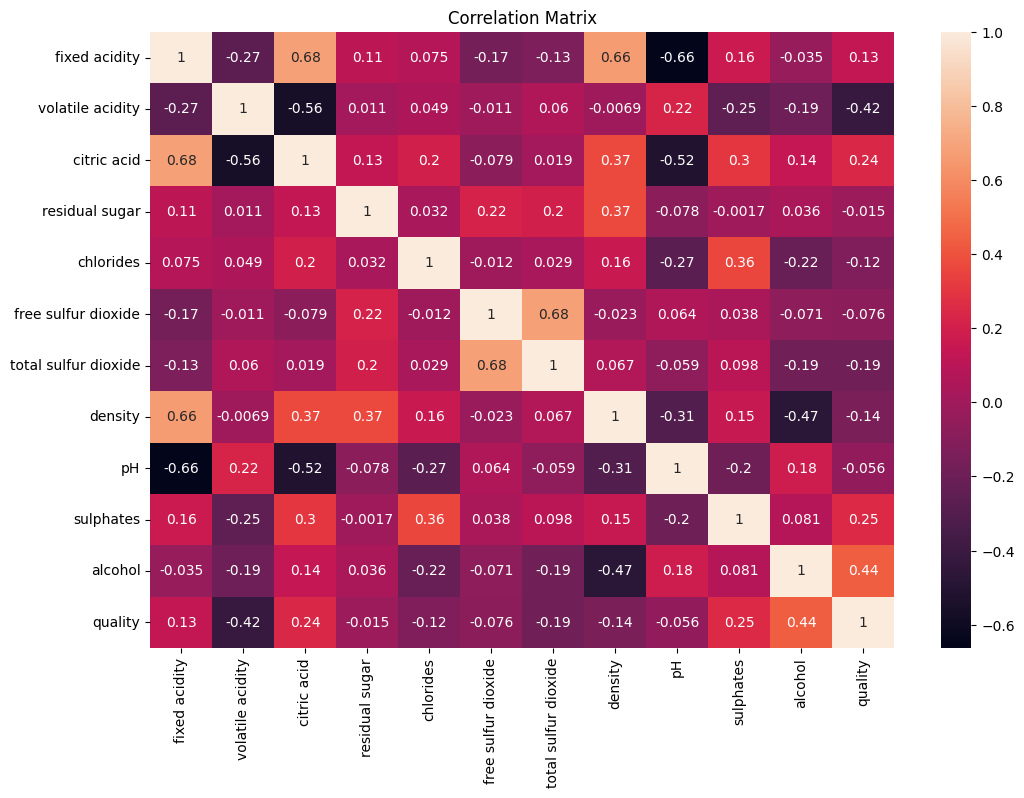

In [2073]:
heat_map(df_train)

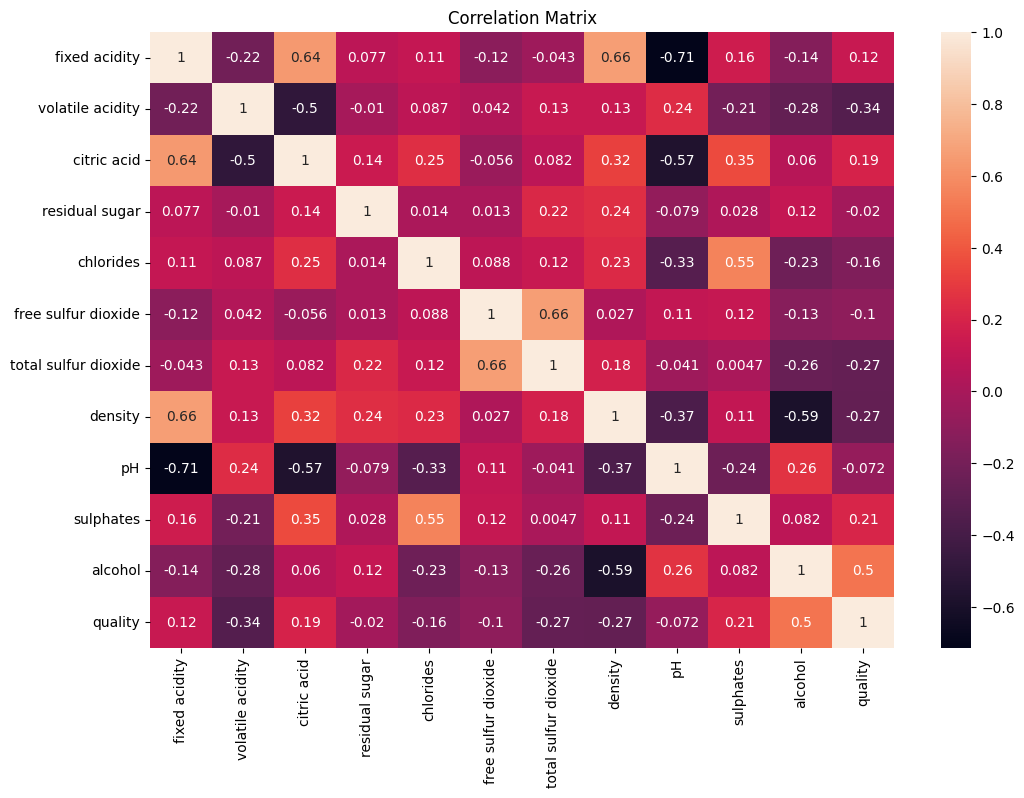

In [2074]:
heat_map(df_validation)

In [2075]:
# Replace outliers with mean
def replace_with_mean(df, name):
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    name_mean = df[name].mean()

    df[name] = np.where((df[name] < lower_limit) | (df[name] > upper_limit), name_mean, df[name])
    return df

In [2076]:
# Replace outliers with median
def replace_with_median(df, name):
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    name_median = df[name].median()

    df[name] = np.where((df[name] < lower_limit) | (df[name] > upper_limit), name_median, df[name])
    return df

In [2077]:
# By observing box plot of features, we can replace outliers with mean
X_train_to_check = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
X_validation_to_check = ['residual sugar', 'chlorides', 'density', 'sulphates']

In [2078]:
# Replace outliers with mean
# for name in X_train_to_check:
#     X_train_replaced = replace_with_mean(X_train, name)

# for name in X_validation_to_check:
#     X_validation_replaced = replace_with_mean(X_validation, name)

In [2079]:
# Replace outliers with median
for name in X_train_to_check:
    X_train_replaced = replace_with_median(X_train, name)

for name in X_validation_to_check:
    X_validation_replaced = replace_with_median(X_validation, name) 

In [2080]:
# New boxplots
# box_plot_all(X_train_replaced, "train")

In [2081]:
# box_plot_all(X_validation_replaced, "validation")

In [2082]:
# Calculate skewness of all features in a dataframe
def skew_calc(df):
    skew_vals_rev = {df[name].skew():name for name in df}
    skew_vals_rev_sorted = dict(sorted(skew_vals_rev.items()))
    skew_vals = {value:key for key, value in skew_vals_rev_sorted.items()}
    print(f"Skewness of all features in given dataframe: ")
    for key, value in skew_vals.items():
        print(f"{key} = {value}")

In [2083]:
# Calculate skewness of features in X_train, print in increasing order
skew_calc(X_train_replaced)

Skewness of all features in given dataframe: 
pH = -0.007537879975445934
density = 0.012497240793957323
chlorides = 0.23979328242664608
volatile acidity = 0.2476795515443026
citric acid = 0.29487725679585225
residual sugar = 0.5464018511277746
fixed acidity = 0.6327086212137217
sulphates = 0.6351203149357216
free sulfur dioxide = 0.8235973014439735
total sulfur dioxide = 0.9388066244170179
alcohol = 0.9518607069483428


In [2084]:
skew_calc(X_validation_replaced)

Skewness of all features in given dataframe: 
density = 0.10712314794336214
pH = 0.21089196121493933
chlorides = 0.2783996173301992
citric acid = 0.43551943208901694
volatile acidity = 0.4515967325978047
residual sugar = 0.4693269834403939
sulphates = 0.645971447513262
alcohol = 0.7804606875056638
free sulfur dioxide = 0.9038166574998514
fixed acidity = 0.930965965089329
total sulfur dioxide = 1.2129466935375377


In [2085]:
# Function to generate a list of features which have skewness not in range -1 to 1
def skewed_list_fun(df):
    skewed_list = [name for name in df if df[name].skew() > 1 or df[name].skew() < -1]
    return skewed_list

In [2086]:
skewed_list = skewed_list_fun(X_train)
print(skewed_list)

[]


In [2087]:
skew_calc(X_train[skewed_list])

Skewness of all features in given dataframe: 


In [2088]:
# Initial log transformation to reduce skewness
for name in skewed_list:
    X_train[f"{name}_log"] = np.log1p(X_train[name])
    X_validation[f"{name}_log"] = np.log1p(X_validation[name])

In [2089]:
# Skew calculation after log function, X_train
train_skewed_list = skewed_list_fun(X_train)
skew_calc(X_train[train_skewed_list])

Skewness of all features in given dataframe: 


In [2090]:
# Skew calculation after log function, X_validation
valid_skewed_list = skewed_list_fun(X_validation)
skew_calc(X_validation[valid_skewed_list])

Skewness of all features in given dataframe: 
total sulfur dioxide = 1.2129466935375377


In [2091]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.8,0.770,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.9
1,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.99680,3.46,0.59,10.2
2,9.8,0.250,0.49,2.7,0.088,15.0,33.0,0.99820,3.42,0.90,10.0
3,11.4,0.625,0.66,2.2,0.088,6.0,24.0,0.99880,3.11,0.99,13.3
4,7.1,0.720,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8


In [2092]:
X_validation.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4
1,8.3,0.490,0.36,1.8,0.077,6.0,16.0,0.99800,3.18,0.60,9.5
2,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6
3,8.1,0.780,0.10,3.3,0.090,4.0,13.0,0.99855,3.36,0.49,9.5
4,7.5,0.380,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.6


In [2093]:
skewed_list

[]

In [2094]:
# Removing list of previously skewed features and rename the dataframes
# X_train_log = X_train.drop(skewed_list, axis = 1)
# X_validation_log = X_validation.drop(skewed_list, axis = 1)

In [2095]:
# X_train_log.head()

In [2096]:
# X_validation_log.head()

In [2097]:
# After filtering log and non-log features of same name, ones with still high skew
# print(f"Skew other than -1 to 1: {skewed_list_fun(X_train_log)}")
# for name in skewed_list_fun(X_train_log):
#     print(f"{name} : {X_train_log[name].skew()}")

In [2098]:
# After some EDA, replaced outliers with median
linear_regression(X_train_replaced, y_train, X_validation_replaced, y_validation)

Using Linear Regression Model: 
MSE: 0.41892384922693626
RMSE: 0.6472432689699725
R2 Score: 0.3582400490569344


In [2099]:
# print(f"Skew crossing -1 to 1 range for X_train_log: {skewed_list_fun(X_train_log)}")
# print(f"Skew crossing -1 to 1 range for X_validation_log: {skewed_list_fun(X_validation_log)}")

In [2100]:
# print(f"Skew of chlorides_log: {X_train_log['chlorides_log'].skew()}")
# X_train_log['chlorides_log'] = np.log1p(X_train_log['chlorides_log'])
# print(f"Skew of chlorides_log after log function (again): {X_train_log['chlorides_log'].skew()}")
# ''' Value hasn't really changed so we use another method '''

In [2101]:
# from scipy import stats
# skew_calc(X_train_log)

In [2102]:
# Box Cox only works for positives, for training - On features with extreme skew
# X_train_log['chlorides_log'] = stats.boxcox(X_train_log['chlorides_log'])[0]
# X_train_log['residual sugar_log'] = stats.boxcox(X_train_log['residual sugar_log'])[0]
# X_train_log['sulphates_log'] = stats.boxcox(X_train_log['sulphates_log'])[0]

In [2103]:
# skew_calc(X_train_log) # Skewness of all features between -1 to 1 now

In [2104]:
# skew_calc(X_validation_log)

In [2105]:
# # Box Cox only works for positives, for validation
# X_validation_log['chlorides_log'] = stats.boxcox(X_validation_log['chlorides_log'])[0]
# X_validation_log['residual sugar_log'] = stats.boxcox(X_validation_log['residual sugar_log'])[0]
# X_validation_log['sulphates_log'] = stats.boxcox(X_validation_log['sulphates_log'])[0]

In [2106]:
# skew_calc(X_validation_log) # Skewness of all features between -1 to 1 now

In [2107]:
# After all skewed features are in range -1 to 1
# linear_regression(X_train_log, y_train, X_validation_log, y_validation)

In [2108]:
''' Box plot after skewness was limited to -1 to 1 '''
# box_plot_all(X_train_log, "train")

' Box plot after skewness was limited to -1 to 1 '

In [2109]:
# box_plot_all(X_validation_log, "validation")

In [2110]:
''' Hist plot after skewness was limited to - 1 to 1 '''
# hist_plot_all(X_train_log, 'train')

' Hist plot after skewness was limited to - 1 to 1 '

In [2111]:
# hist_plot_all(X_validation_log, 'validation')

In [2112]:
# Using log to decrease skew isn't really helping here
# Substituting the outliers with mean, median, other values
# Let's replace the outliers using Mean or Median

Using Random Forest Model: 
MSE: 0.38205046875
RMSE: 0.6181023125260089
R2 Score: 0.41472730536772184


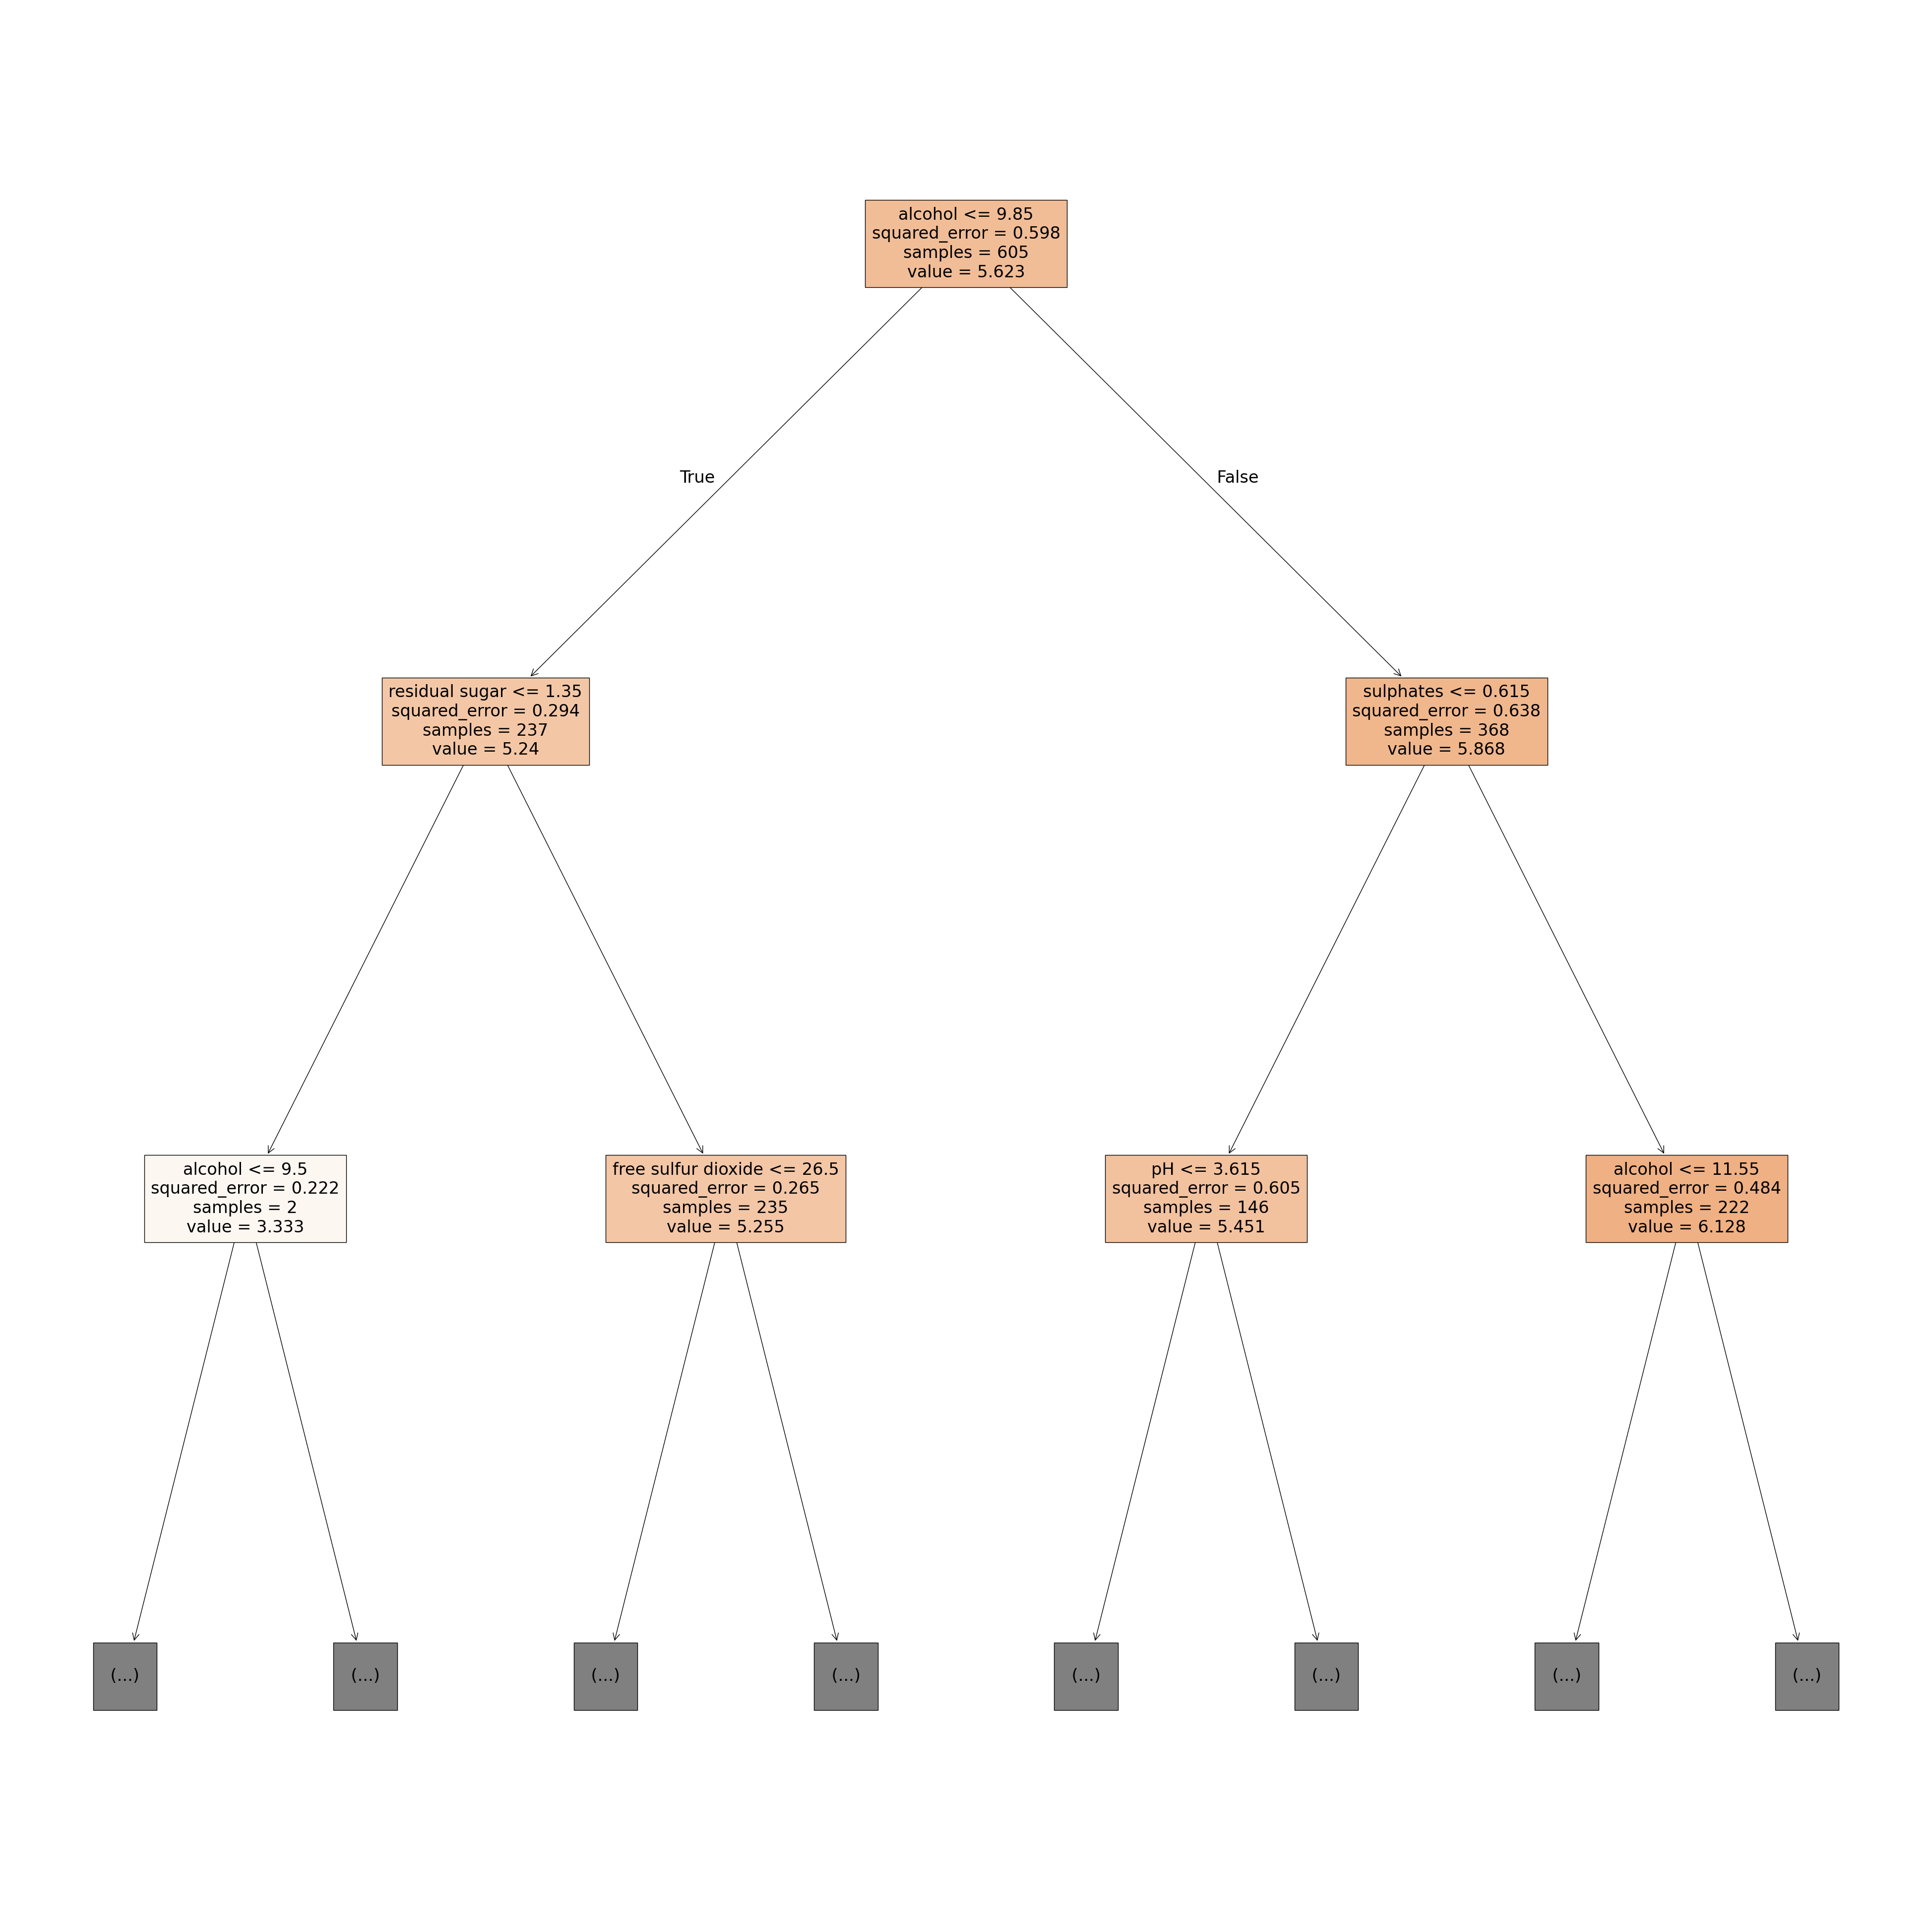

In [2113]:
# Trying Random Forest Classifier
random_forest_reg(X_train_replaced, y_train, X_validation_replaced, y_validation)

In [2114]:
# Trying KNN Regressor
knn_reg(X_train_replaced, y_train, X_validation_replaced, y_validation)

Using KNN Regressor Model: 
MSE: 0.568
RMSE: 0.7536577472566709
R2 Score: 0.1298665549637963
